## EDA for Customer Rentention and Lifetime Value

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load Customers dataset
customers = pd.read_csv("Customers.csv", index_col=0)
customers.head()

,CustomerID,Age,Gender,Payment Method,Churn,Tenure,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,CashbackAmount
0,0,33,Female,Cash,0,8.0,2.0,1,2,12.0,1.0,1.0,140.703359
1,1,17,Female,Cash,0,28.0,2.0,4,5,15.0,2.0,7.0,171.392689
2,2,42,Female,Cash,0,16.0,2.0,3,4,12.0,0.0,4.0,145.876811
3,3,37,Female,Cash,1,1.0,2.0,4,4,16.0,1.0,2.0,144.754387
4,4,63,Female,Cash,1,1.0,4.0,6,4,12.0,2.0,2.0,151.996592


In [3]:
customers.describe()

,CustomerID,Age,Churn,Tenure,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,CashbackAmount
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,49999.500000,43.333280,0.211020,8.942960,2.678050,3.523780,2.838910,14.339610,1.866220,2.775790,167.956487
std,28867.657797,15.380321,0.408035,8.175544,1.173836,1.199178,1.397698,4.326902,2.070895,2.937534,42.149189
min,0.000000,15.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,105.807333
25%,24999.750000,30.000000,0.000000,1.000000,2.000000,3.000000,1.000000,12.000000,1.000000,1.000000,141.933655
50%,49999.500000,43.000000,0.000000,7.000000,3.000000,3.000000,3.000000,13.000000,1.000000,2.000000,157.257743
75%,74999.250000,57.000000,0.000000,14.000000,4.000000,4.000000,4.000000,17.000000,2.000000,3.000000,180.061258
max,99999.000000,73.000000,1.000000,35.000000,5.000000,6.000000,5.000000,26.000000,15.000000,16.000000,324.990000


### Calculating churn rates

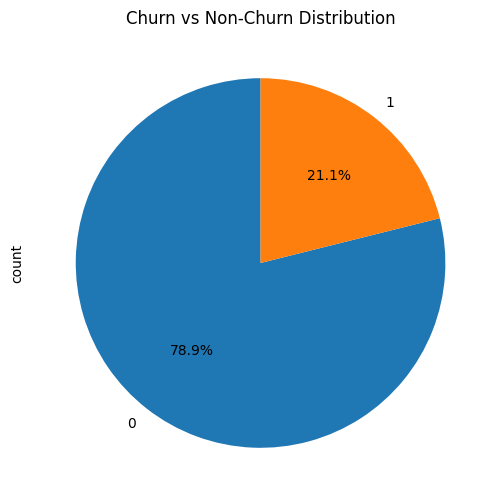

Churn Rate: 21.10%


In [4]:
# Calculate overall churn rates
n_cust = customers.shape[0]

overall_churn_rate = sum(customers['Churn']) * 100 / n_cust 

churn_counts = customers['Churn'].value_counts()
churn_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, figsize=(6,6))
plt.title('Churn vs Non-Churn Distribution')
plt.show()

print(f"Churn Rate: {overall_churn_rate:.2f}%")

## Data Visualizations

In [5]:
customers['GenderMap'] = customers['Gender'].map({'Male': 1, 'Female': 0})

### Correlation Matrix

Based on the correlation heatmap, it can be observed that variables with highest correlation to Churn is `Tenure`, `CashbackAmount`, `OrderCount`,`CouponUsed`, `HourSpendOnApp` (in decreasing order). 

`OrderAmountHikeFromlastYear` also shows some correlation with Churn, suggesting that it warrants further analysis to explore its potential impact.


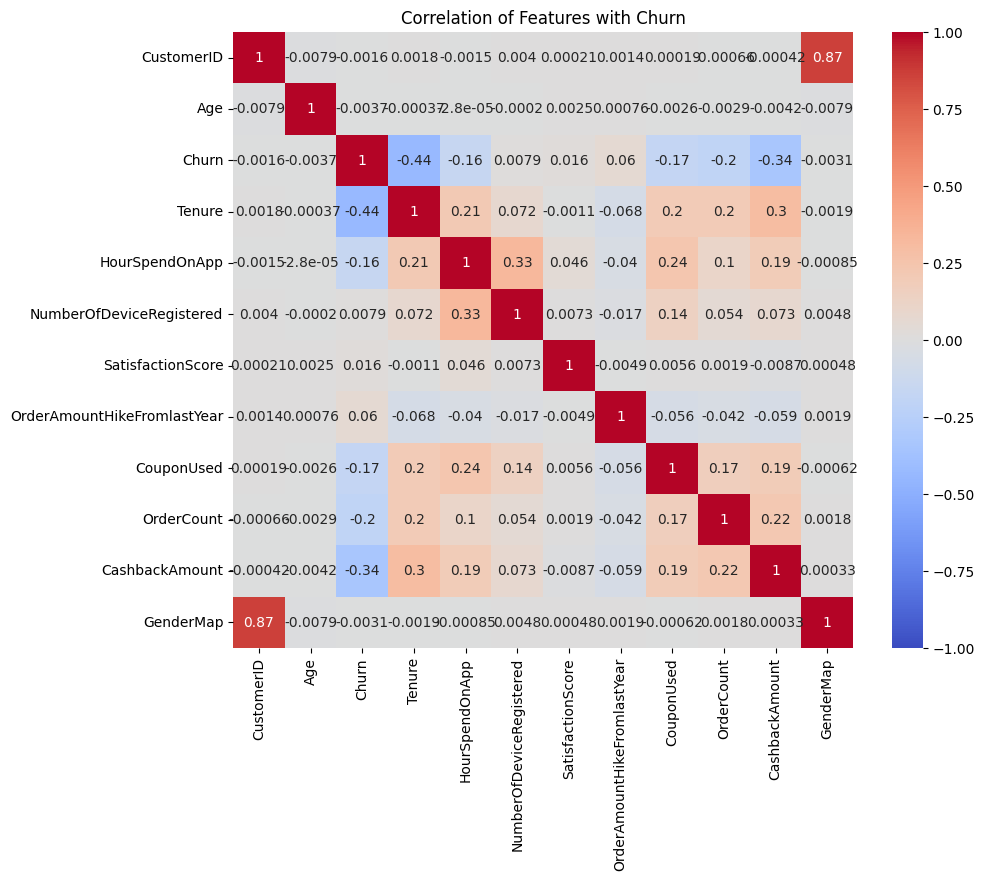

In [6]:
plt.figure(figsize=(10, 8))
sns.heatmap(customers.corr(numeric_only=True), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation of Features with Churn')
plt.show()

### Pie Chart of Churn By Gender

From the correlation matrix above, `Gender` has a low correlation with `Churn`. This is supported by the pie charts where the churn rates are similar for both male and female customers

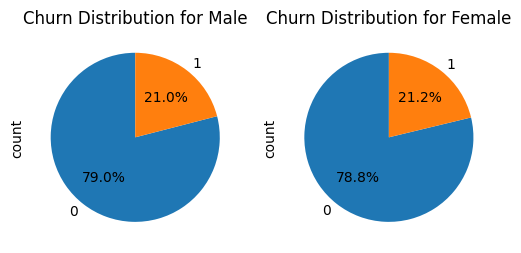

In [7]:
male = customers[customers['Gender'] == 'Male']
female = customers[customers['Gender'] != 'Male']

plt.figure(figsize=(12, 8))

plt.subplot(1,2,1)
male['Churn'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90, figsize=(6,6))
plt.title('Churn Distribution for Male')

plt.subplot(1,2,2)
female['Churn'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90, figsize=(6,6))
plt.title('Churn Distribution for Female')
plt.show()

### Box Plots

`Tenure` stands out with the most noticeable difference in the median between customers who churned and those who did not, suggesting it's a strong indicator of churn. 

This is followed by `CashbackAmount` and `HourSpendOnApp`, where the differences in medians are also quite clear, implying that these features play a role in customer retention.

For `OrderCount` and `CouponUsed`, there seems to be some difference in medians, but it’s difficult to interpret from the current plots due to scaling issues, which makes the distinction less obvious.

On the other hand, `OrderAmountHikeFromlastYear` shows little variation in the medians, indicating that this feature may not be particularly relevant for predicting churn.

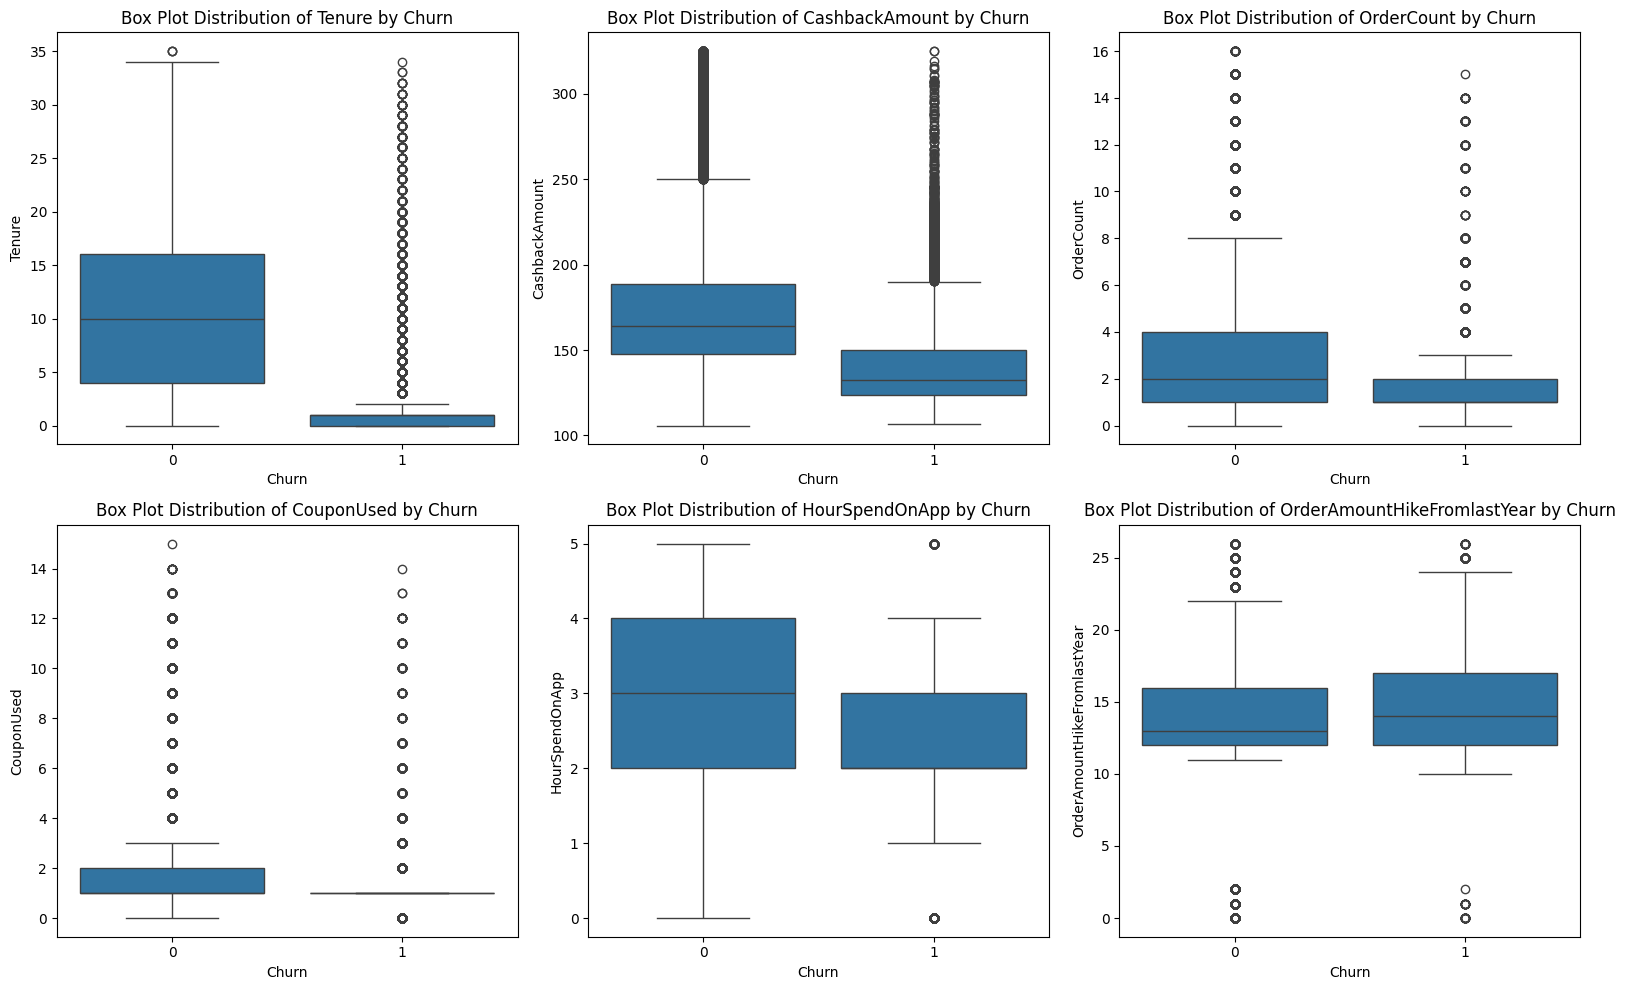

In [19]:
cols = ['Tenure', 'CashbackAmount', 'OrderCount', 'CouponUsed','HourSpendOnApp', 'OrderAmountHikeFromlastYear']

plt.figure(figsize=(16, 10))

# For loop to create box plots for each variable in 'numerical_columns'
for i, column in enumerate(cols):
    plt.subplot(2,3, i+1)
    sns.boxplot(x='Churn', y=column, data=customers)
    plt.title(f'Box Plot Distribution of {column} by Churn')
    plt.xlabel('Churn')
    plt.ylabel(column)

plt.tight_layout()
plt.show()

### KDE Plots

`Tenure` (having the strongest correlation with churn) once again shows a clear pattern. There's a high density of churned customers with tenures between 0 to 3 years, while the distribution for non-churned customers is relatively uniform.

For `HourSpendOnApp`, non-churned customers show higher peaks around 2 to 4 hours, whereas churned customers have a sharp peak at 0 hours, indicating low engagement among those who churned.

`CouponUsed` reveals a distinct pattern, with churned customers showing a significantly higher peak at 1 coupon, and a slightly higher density at 2 coupons compared to non-churned customers. Similarly, `OrderCount` is notably higher for churned customers at 1 and 2 orders.

The `CashbackAmount` distribution shows a very high peak for churned customers around 120-130, while non-churned customers exhibit a more uniform distribution, with a small peak at approximately 150.

Lastly, the distribution of `OrderAmountHikeFromlastYear` appears similar for both churned and non-churned customers, indicating little difference in this feature's influence on churn. 

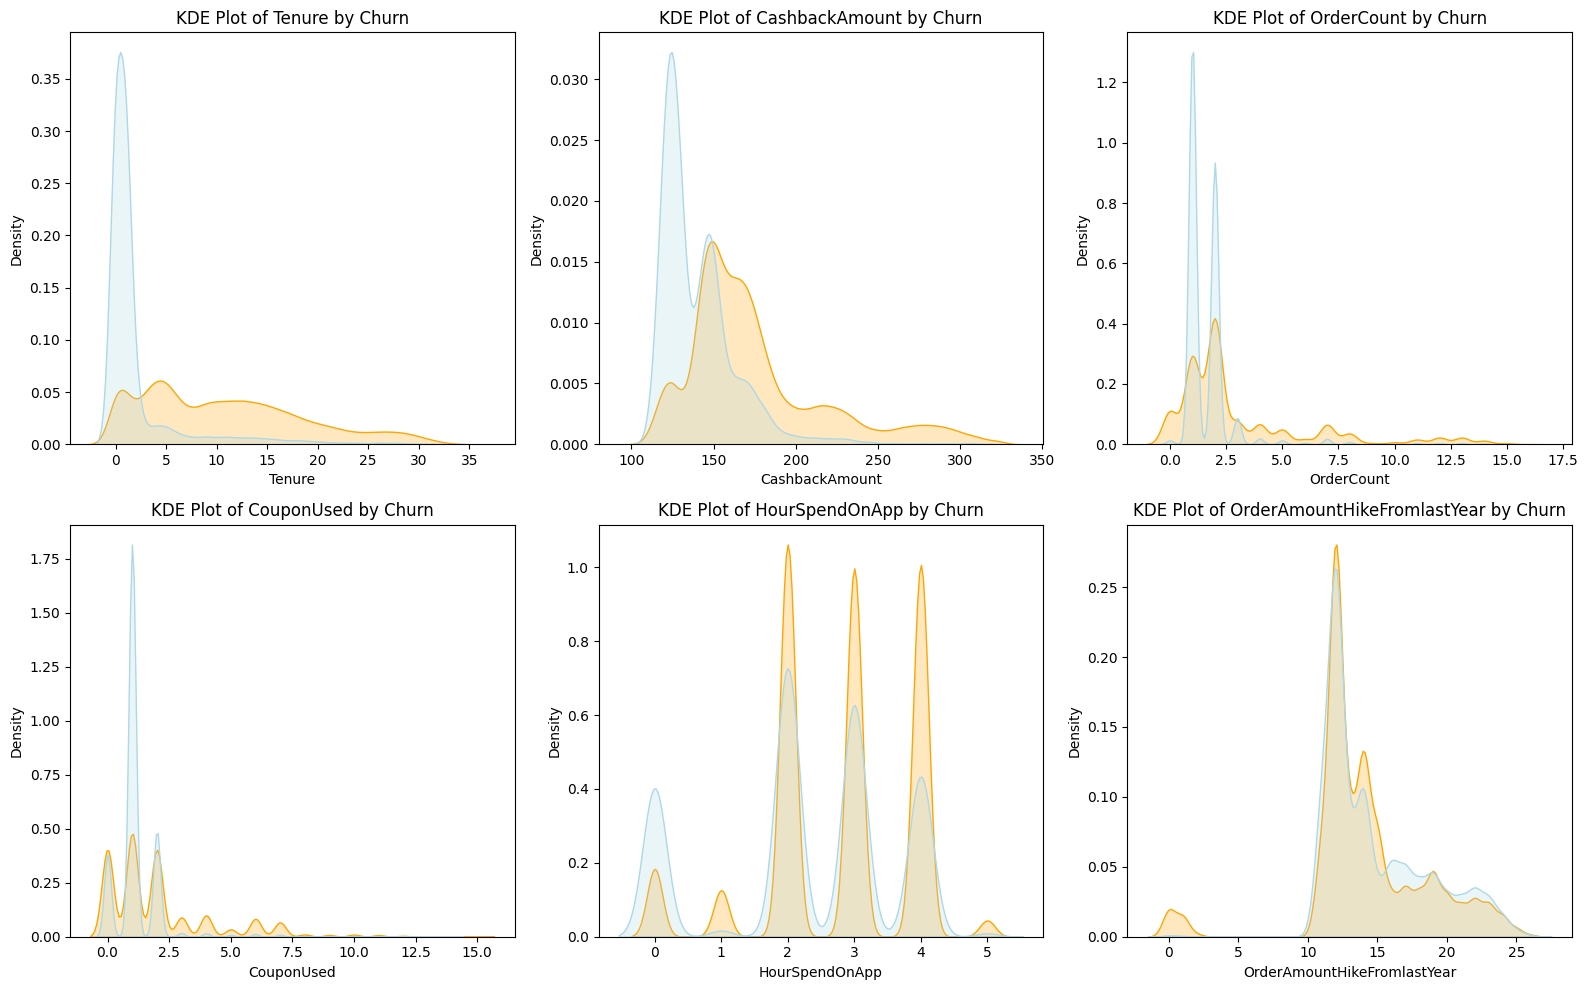

In [20]:
plt.figure(figsize=(16, 10))

for i, column in enumerate(cols):
    ax = plt.subplot(2,3, i+1)
    sns.kdeplot(customers[customers['Churn'] == 0][column], label='Non-Churned', fill=True, ax = ax, color='orange')
    sns.kdeplot(customers[customers['Churn'] == 1][column], label='Churned', fill=True, ax= ax, color='lightblue')
    ax.set_title(f'KDE Plot of {column} by Churn')
    ax.set_xlabel(f'{column}')
    ax.set_ylabel('Density')

plt.tight_layout()
plt.show()

Hence, aside from `HourSpendOnApp`, the remaining features are likely essential indicators of churn, as highlighted by their correlation with churn.

## Predictive Modelling 

Now, we will make use of machine learning models to find the features most important for predicting churn and thus characteristics of customers likely to churn, and identify at-risk customers.

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


customers_encoded = pd.get_dummies(customers, columns=['Payment Method'])

X = customers_encoded.drop(['Churn','Gender', 'CustomerID'], axis = 1)
y = customers_encoded['Churn']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
from sklearn.model_selection import RandomizedSearchCV

param_grid = {
    'n_estimators': [300, 400, 500],       # Number of trees in the forest
    'max_depth': [10, 20, 30],       # Maximum depth of each tree
    'min_samples_split': [2, 5, 10],       # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],         # Minimum number of samples required to be at a leaf node
    'bootstrap': [True]            # Whether to bootstrap samples
}

search = RandomizedSearchCV(estimator=RandomForestClassifier(), param_distributions=param_grid, n_iter=50,
                           cv=5, n_jobs=-1, verbose=2, random_state=42)

search.fit(X_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=50,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True],
                                        'max_depth': [10, 20, 30],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [300, 400, 500]},
                   random_state=42, verbose=2)

In [13]:
print("Best Parameters: ", search.best_params_)

# Use the best estimator (Random Forest with the best parameters)
best_rf = search.best_estimator_

# Predict on the test set using the best model
y_pred = best_rf.predict(X_test)

# Evaluate the model
print(f"Test Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred))

Best Parameters:  {'n_estimators': 400, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': 10, 'bootstrap': True}
Test Accuracy: 0.8899
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.94      0.93     15747
           1       0.75      0.72      0.74      4253

    accuracy                           0.89     20000
   macro avg       0.84      0.83      0.83     20000
weighted avg       0.89      0.89      0.89     20000



## Identifying At-Risk Customers

### Using Churn Probabilties

First, identify at-risk customers using churn probabilities from our predictive model:

In [22]:
customers_prob = customers_encoded

customers_prob['Probability'] = best_rf.predict_proba(X)[:, 1]

at_risk = customers_prob[(customers_prob['Churn'] == 0) & (customers_prob['Probability'] > 0.5)]

Next, we will plot bar plots to see the distribution of features for at-risk customers. As seen below: 
- `Age` : Uniform distribution indicates churn is not age-dependent.
- `Tenure` : High customer counts at 0 and 1 years suggest newer customers are more at risk.
Absence of customers with tenures longer than 2 years suggests that retaining customers beyond 2 years may be crucial for reducing churn.
- `HourSpendOnApp` : Highest counts at 0, 2 hours, but also high counts at 3 and 4 hours, indicating varying engagement levels among at-risk customers.
- `NumberOfDeviceRegistered` : Highest customer counts at 3 devices, suggesting potential churn factors.
- `SatisfactionScore` : High counts for scores of 1 and 4.
- `OrderAmountHikeFromlastYear` : Peak at 12 orders, low for 0 to 10.
- `CouponUsed` : High customer counts for 1 coupon, with lesser counts for 0 and 2. This suggests that targeted coupon strategies could play a role in retention efforts.
- `OrderCount` : Very high customer counts at 1 order and significant at 2 orders, indicating that initial ordering activity is crucial; thus, strategies to encourage additional orders may be beneficial.
- `CashbackAmount` : Peak at ~$130, with another smaller peak at ~$150, suggesting that specific cashback levels may influence customer satisfaction and retention.

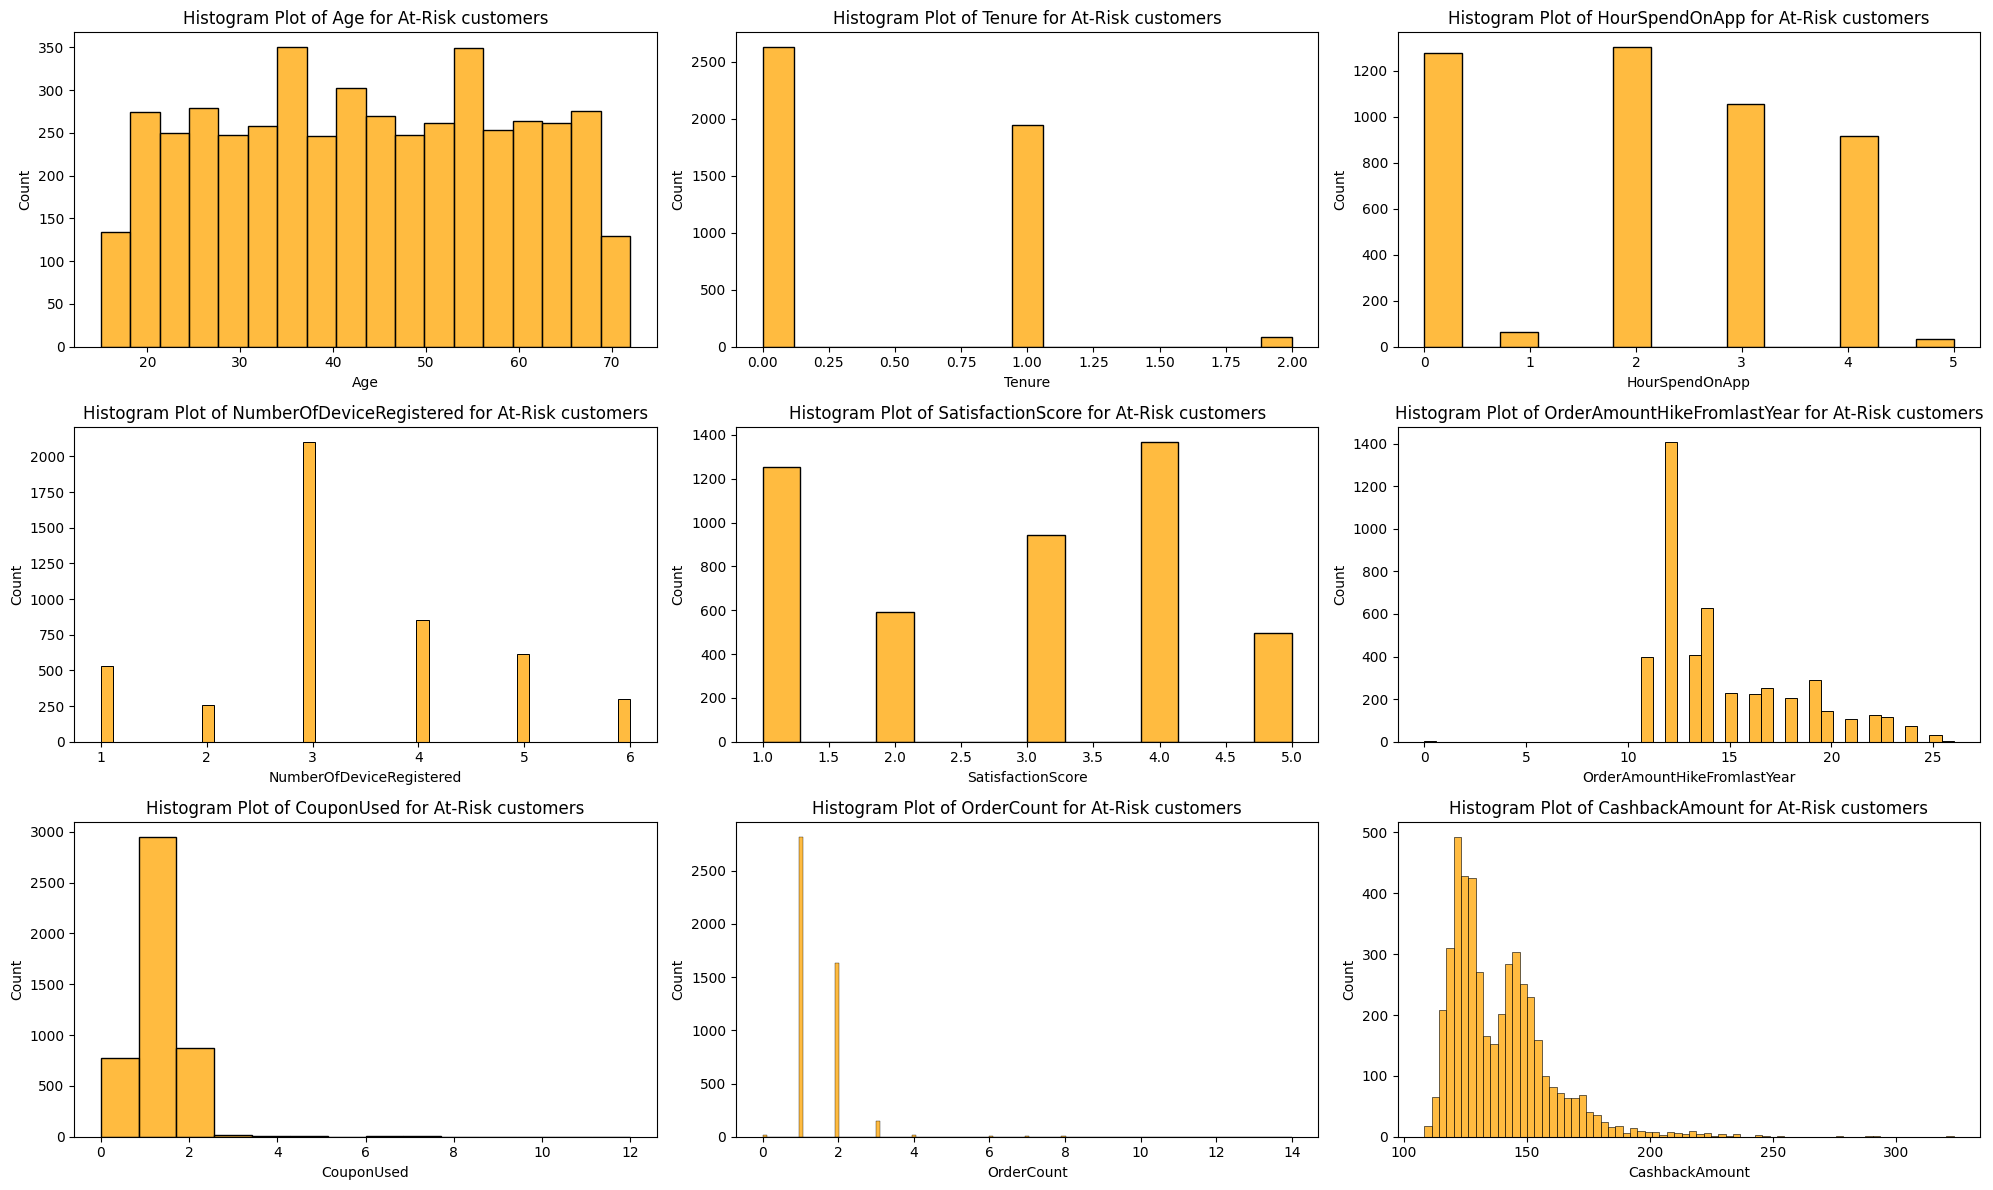

In [23]:
plt.figure(figsize=(20, 12))

cols = ['Age', 'Tenure', 'HourSpendOnApp',
       'NumberOfDeviceRegistered', 'SatisfactionScore',
       'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount',
       'CashbackAmount']

for i, column in enumerate(cols):
    ax = plt.subplot(3,3, i+1)
    sns.histplot(at_risk[column], fill=True, ax = ax, color='orange')
    ax.set_title(f'Histogram Plot of {column} for At-Risk customers')
    ax.set_xlabel(f'{column}')
    ax.set_ylabel('Count')

plt.tight_layout()
plt.show()

### Using Feature Importance

We will also make use of feature importance to find the decision criteria for identifying at-risk customers

c:\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


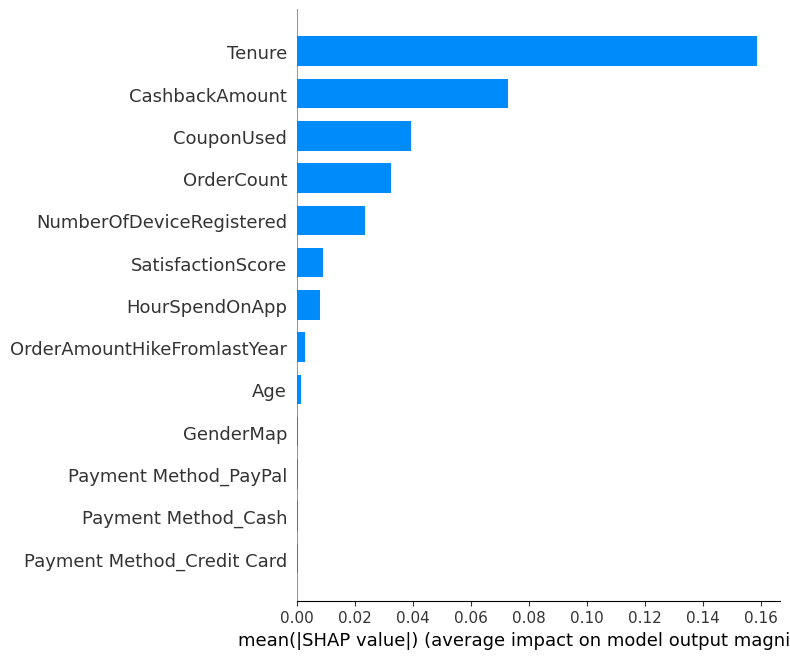

In [16]:
import shap

explainer = shap.TreeExplainer(best_rf)

shap_values = explainer.shap_values(X_test)

# This plot shows which features are contributing the most to the model's predictions
shap.summary_plot(shap_values[...,1], X_test, plot_type="bar")

Based on the feature importances from the Random Forest model, `Tenure`, `CashbackAmount`,`CouponUsed`,`OrderCount` have the highest importance, aligning with expectations set by the correlation matrix.

`NumberOfDeviceRegistered` and `SatisficationScore` have emerged as significant factors.

As for `OrderAmountHikeFromlastYear`, it does not have as much importance as expected.

### Deeper Analysis into important features

SHAP (SHapley Additive exPlanations) plots help visualize the impact of each feature on the model's predictions.
Positive SHAP values push the prediction towards 1 (e.g., churn), while negative SHAP values push it towards 0 (e.g., no churn).

<Figure size 1600x1000 with 0 Axes>

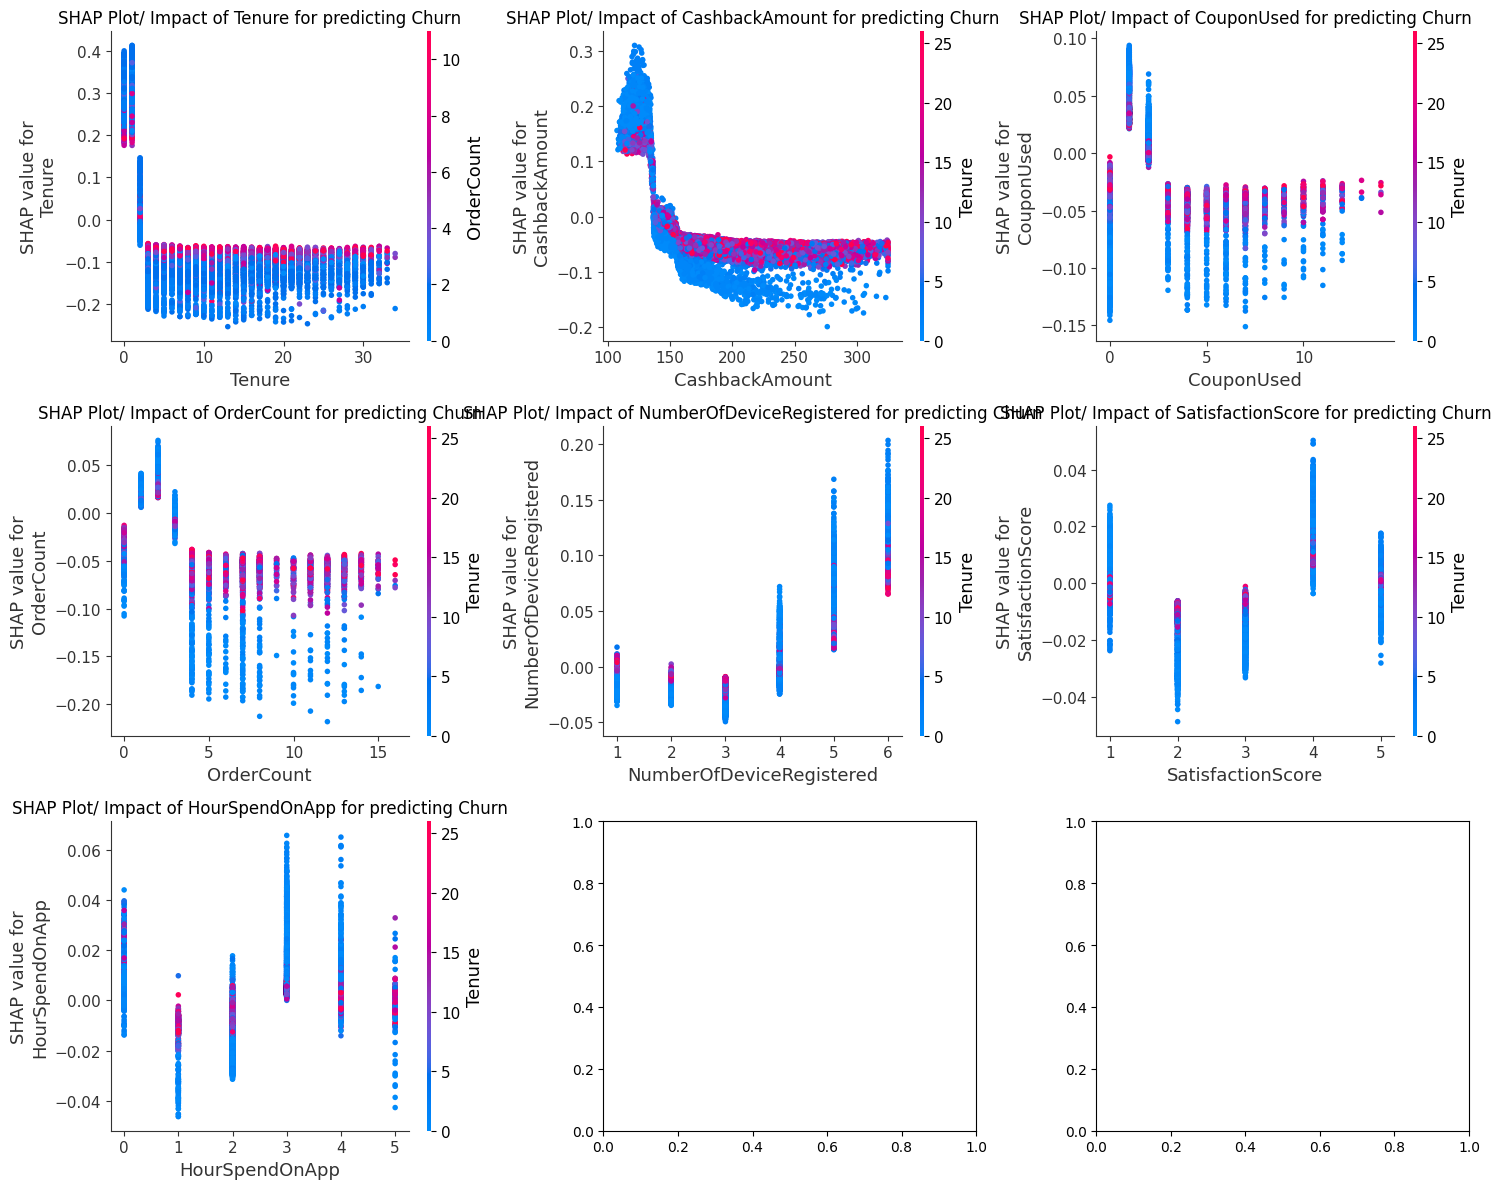

In [17]:
plt.figure(figsize=(16, 10))

features = ['Tenure', 'CashbackAmount','CouponUsed','OrderCount','NumberOfDeviceRegistered', 'SatisfactionScore', 'HourSpendOnApp']

fig, axes = plt.subplots(3, 3, figsize=(15, 12))

# Flatten the axes array for easier indexing
axes = axes.flatten()

for i, column in enumerate(features):
    shap.dependence_plot(column, shap_values[..., 1], X_test, ax=axes[i], show = False)
    axes[i].set_title(f'SHAP Plot/ Impact of {column} for predicting Churn')

plt.tight_layout()
plt.show()

Partial Dependence Plots show the marginal effect of a feature on the predicted outcome of the model, holding all other features constant.
Peaks in PDP show the feature values where the predicted probability/ likeliness of churn is highest.

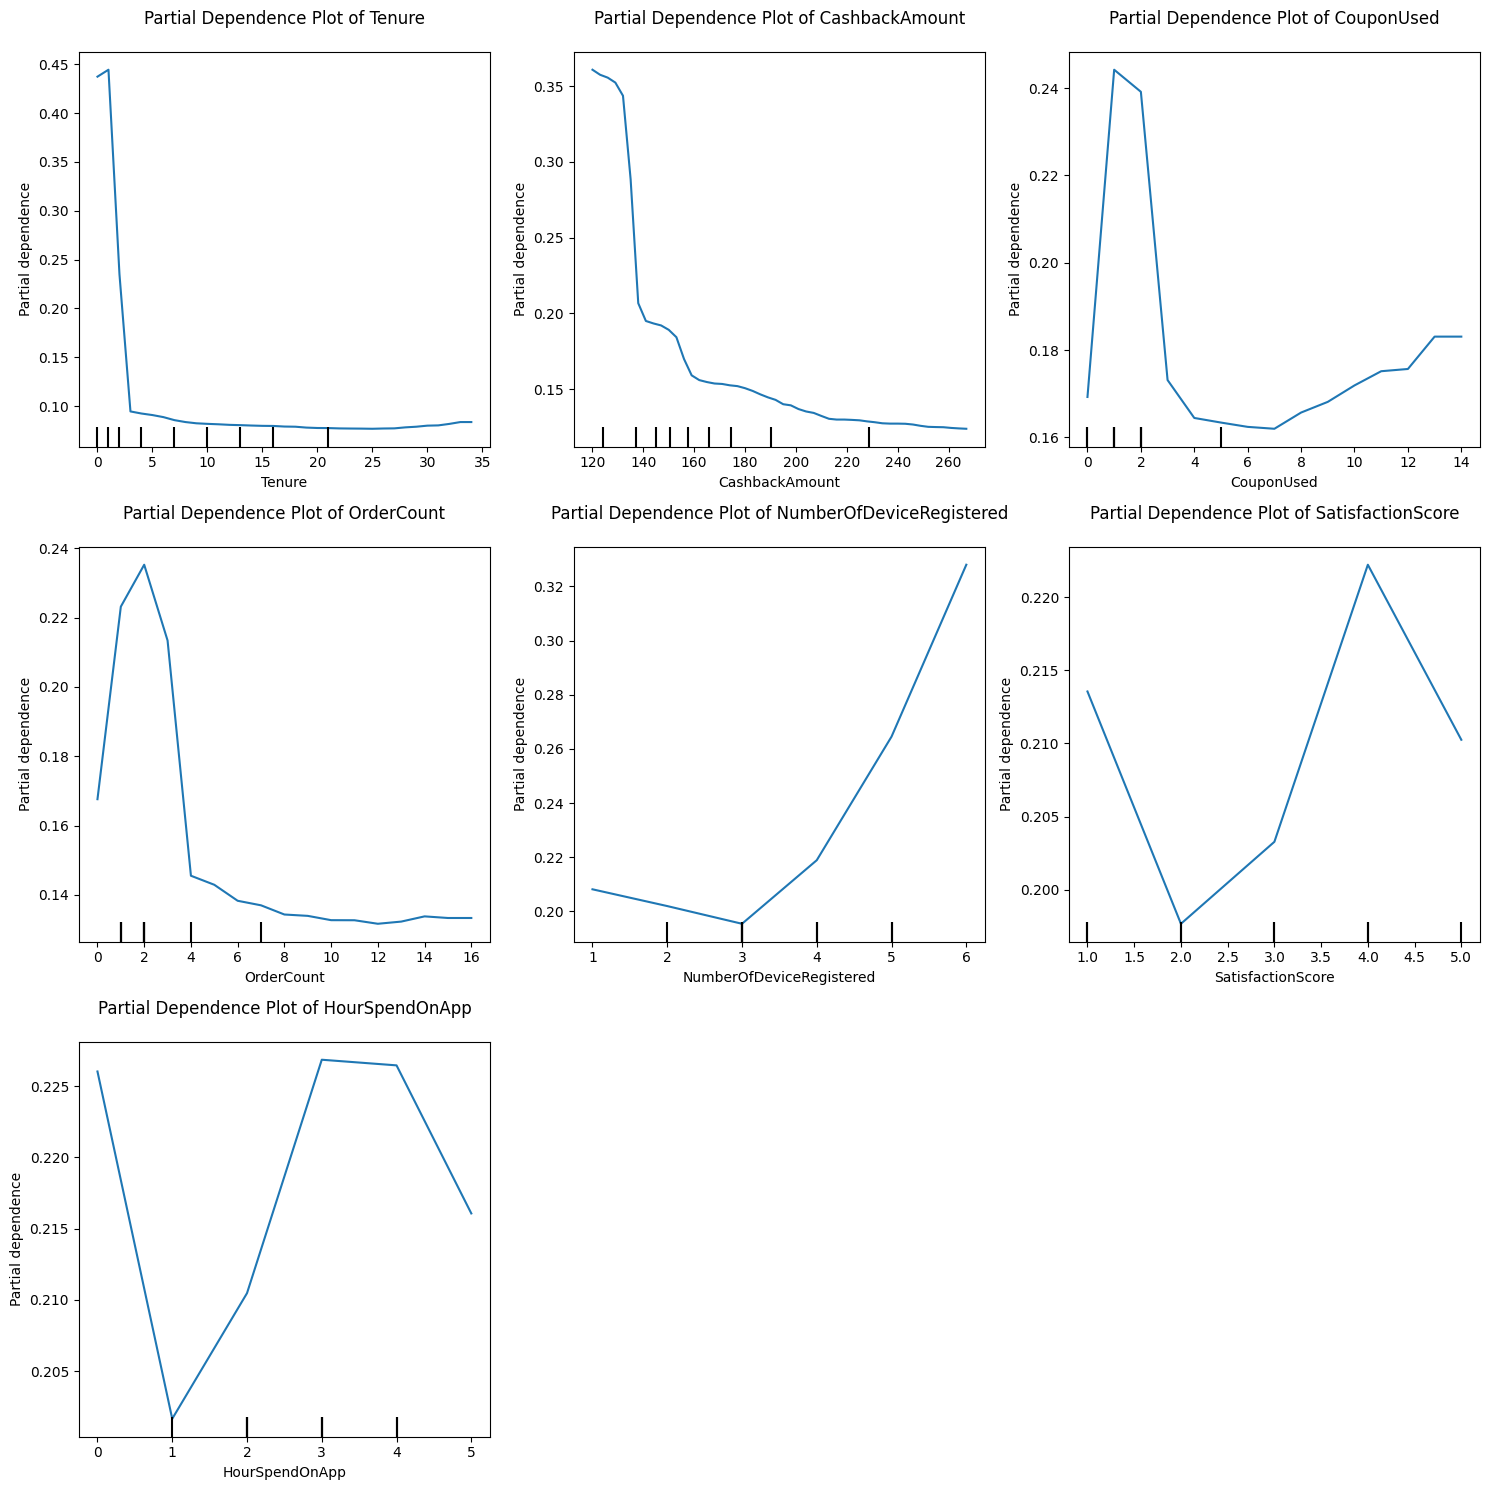

In [18]:
from sklearn.inspection import PartialDependenceDisplay

plt.figure(figsize=(15, 15))

for i, column in enumerate(features):
    ax = plt.subplot(3,3, i+1)
    PartialDependenceDisplay.from_estimator(best_rf, X_test, [column], grid_resolution=50, ax=ax)
    ax.set_title(f'Partial Dependence Plot of {column}', pad = 20)

plt.tight_layout()
plt.show()

As such, we can observe that characteristics of customers likely to churn:
- `Tenure` : Less than 3 years.
- `CashbackAmount` : Less than ~$138.
- `CouponUsed` : 1 to 2.
- `OrderCount` : 1 to 3
- `NumberOfDeviceRegistered` : 4 to 6 (with 6 being the most indicative).
- `SatisficationScore` : 1 or 4.
- `HourSpendOnApp` : 0, 3, or 4 hours.

### All Customers At-Risk

In [27]:
at_risk2 = customers_encoded[
    (customers_encoded['Tenure'] < 3) &
    (customers_encoded['CashbackAmount'] < 138) &
    (customers_encoded['CouponUsed'].isin([1, 2])) &
    (customers_encoded['OrderCount'].isin([1, 2, 3])) &
    (customers_encoded['NumberOfDeviceRegistered'].isin([4, 5, 6])) &
    (customers_encoded['SatisfactionScore'].isin([1, 4])) &
    (customers_encoded['HourSpendOnApp'].isin([0, 3, 4]))
]

In [33]:
at_risk.merge(at_risk2['CustomerID'], on='CustomerID',how='outer')

,CustomerID,Age,Gender,Churn,Tenure,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,CashbackAmount,GenderMap,Payment Method_Cash,Payment Method_Credit Card,Payment Method_PayPal,Probability
0,9,24.0,Female,0.0,1.0,4.0,4.0,4.0,24.0,1.0,2.0,158.279462,0.0,True,False,False,0.600187
1,76,34.0,Female,0.0,0.0,0.0,3.0,2.0,19.0,1.0,1.0,124.786456,0.0,True,False,False,0.692522
2,94,30.0,Female,0.0,0.0,4.0,5.0,2.0,21.0,2.0,2.0,136.468054,0.0,True,False,False,0.615531
3,97,46.0,Female,0.0,1.0,2.0,3.0,4.0,11.0,1.0,1.0,142.741014,0.0,True,False,False,0.558630
4,122,20.0,Female,0.0,0.0,0.0,3.0,1.0,19.0,1.0,1.0,116.933868,0.0,True,False,False,0.739041
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5948,99950,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5949,99971,50.0,Male,0.0,1.0,3.0,3.0,4.0,19.0,1.0,1.0,127.668603,1.0,False,False,True,0.851961
5950,99976,49.0,Male,0.0,1.0,4.0,4.0,5.0,12.0,2.0,2.0,171.139191,1.0,False,False,True,0.539858
5951,99992,21.0,Male,0.0,1.0,4.0,5.0,3.0,14.0,2.0,2.0,148.385486,1.0,False,False,True,0.635272


## Analyze current rentention strategies

Unfortunately, there isn't sufficient data on current retention strategies for us to delve deeper. However, we could use our current dataset to analyze customer behavior patterns, such as coupon usage, cashback amounts, and satisfaction scores, to infer the effectiveness of existing strategies. By identifying trends among at-risk customers, we could also propose targeted interventions to improve retention, even without direct data on current efforts.

High-risk customers are using fewer coupons (1 to 2, compared to a maximum of 14), which could suggest that current strategies aren’t resonating with them or that they’re unaware of these offers. 

Additionally, their cashback amounts are low, indicating that they may not be taking advantage of available promotions. 

For customers with a satisfaction score of 1, dissatisfaction is a clear signal of potential churn, while those with a score of 4 may require stronger engagement to prevent them from seeking alternatives.